## 3-1-1 Contact Centre Metrics Dataset

```markdown
## Disclaimer
```
This notebook was created by **Yihua Cai [cai.yihu@northeastern.edu]**.
```
The analysis and results presented in this notebook are based on the 3-1-1 Contact Centre Metrics Dataset. The interpretations and conclusions drawn from the data are my own and do not represent the views or opinions of any organization. The code and methods used are for educational and illustrative purposes only.
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data cleaning

In [2]:
# Load the dataset
df = pd.read_csv('3-1-1-contact-centre-metrics.csv', delimiter=';')

# Display the first few rows of the dataset
df.head()

,Date,CallsOffered,CallsHandled,CallsAbandoned,AverageSpeedofAnswer,ServiceLevel,BI_ID
0,2024-08-31,418,399,17,25.421053,0.826829,1
1,2024-08-30,1059,975,72,70.466667,0.712223,2
2,2024-08-29,1118,1086,27,22.876611,0.870036,3
3,2024-08-28,1129,1058,65,52.136106,0.754069,4
4,2024-08-27,1204,1134,61,65.505291,0.733898,5


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5555 entries, 2024-08-31 to 2009-06-15
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CallsOffered          5555 non-null   int64  
 1   CallsHandled          5555 non-null   int64  
 2   CallsAbandoned        5555 non-null   int64  
 3   AverageSpeedofAnswer  5555 non-null   float64
 4   ServiceLevel          5555 non-null   float64
 5   BI_ID                 5555 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 303.8 KB
None
       CallsOffered  CallsHandled  CallsAbandoned  AverageSpeedofAnswer  \
count   5555.000000   5555.000000     5555.000000           5555.000000   
mean    1827.705491   1646.992979      133.949235             54.735140   
std      958.298367    846.466526      141.728036             54.728551   
min      109.000000    104.000000        0.000000              0.000000   
25%     1024.500000    929.000000   

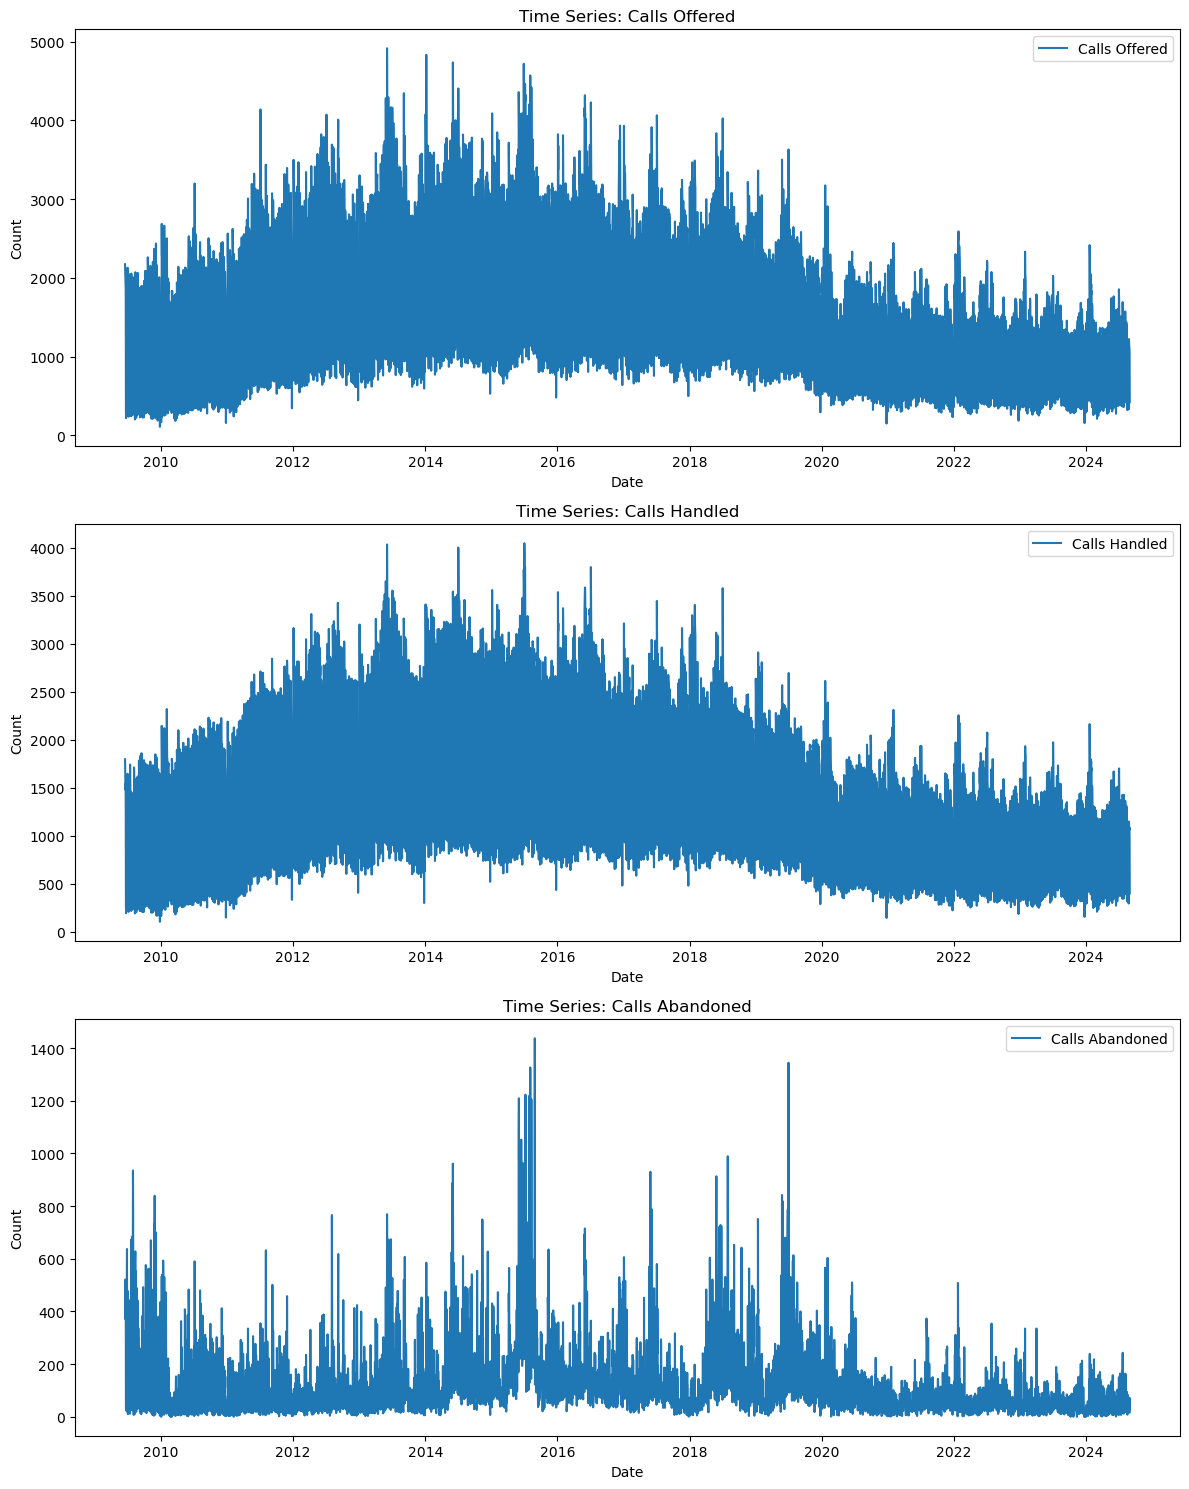

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

print(df.info())

# Basic statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plot Time Series
time_series = [df['CallsOffered'], df['CallsHandled'], df['CallsAbandoned']]
f, axarr = plt.subplots(3, 1, figsize=(12, 15))
for series, label, ax in zip(time_series, ['Calls Offered', 'Calls Handled', 'Calls Abandoned'], axarr):
    ax.plot(series, label=label)
    ax.set_title(f'Time Series: {label}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.legend()
plt.tight_layout()
plt.show()


### Seasonal Data EDA

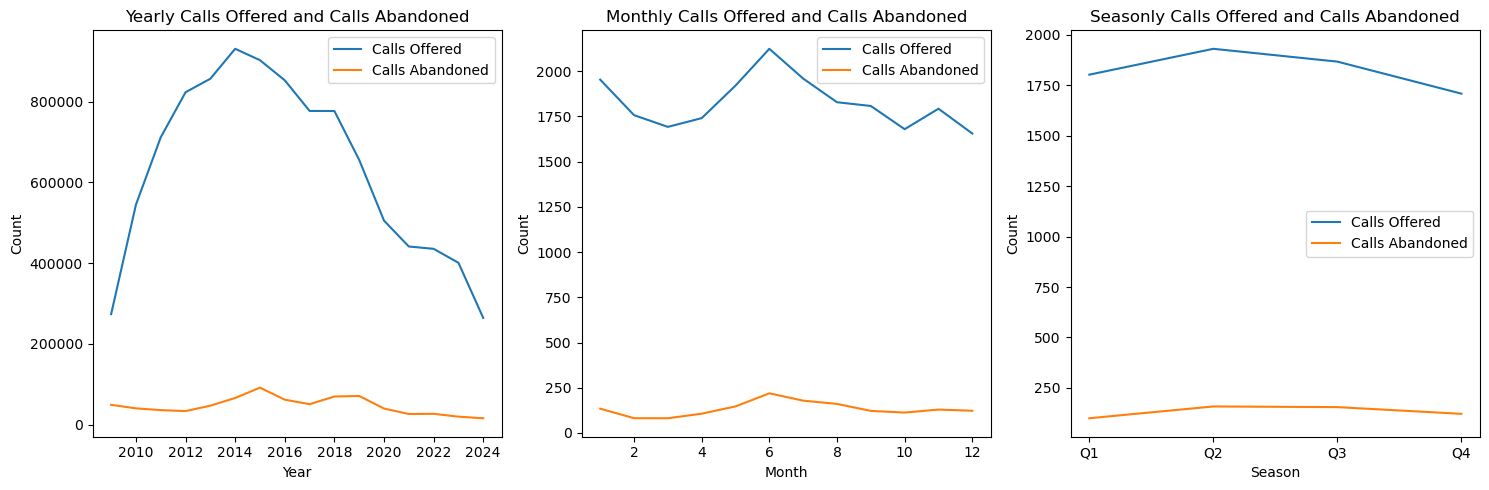

In [4]:
df['Year'] = df.index.year #Group the data by year
yearly_data = df.groupby('Year')[['CallsOffered', 'CallsHandled', 'CallsAbandoned']].sum()
df['Month'] = df.index.month #Group the data by month
monthly_data = df.groupby('Month')[['CallsOffered', 'CallsHandled', 'CallsAbandoned']].mean()
df['Season'] = df.index.quarter # Group the data by month
seasonly_data = df.groupby('Season')[['CallsOffered', 'CallsHandled', 'CallsAbandoned']].mean()

fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

# Yearly data plot
axarr[0].plot(yearly_data['CallsOffered'], label='Calls Offered')
axarr[0].plot(yearly_data['CallsAbandoned'], label='Calls Abandoned')
axarr[0].set_title('Yearly Calls Offered and Calls Abandoned')
axarr[0].set_xlabel('Year')
axarr[0].set_ylabel('Count')
axarr[0].legend()

# Monthly data plot
axarr[1].plot(monthly_data['CallsOffered'], label='Calls Offered')
axarr[1].plot(monthly_data['CallsAbandoned'], label='Calls Abandoned')
axarr[1].set_title('Monthly Calls Offered and Calls Abandoned')
axarr[1].set_xlabel('Month')
axarr[1].set_ylabel('Count')
axarr[1].legend()

# Seasonly data plot
axarr[2].plot(seasonly_data['CallsOffered'], label='Calls Offered')
axarr[2].plot(seasonly_data['CallsAbandoned'], label='Calls Abandoned')
axarr[2].set_title('Seasonly Calls Offered and Calls Abandoned')
axarr[2].set_xlabel('Season')
axarr[2].set_xticks(np.arange(1, 5))
axarr[2].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
axarr[2].set_ylabel('Count')
axarr[2].legend()

plt.tight_layout()
plt.show()


/var/folders/q3/s6yxqsxx3sx372bh869t8j9r0000gn/T/ipykernel_78597/2588859455.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  result = seasonal_decompose(df['CallsOffered'].resample('M').mean(), model='multiplicative', period=12)


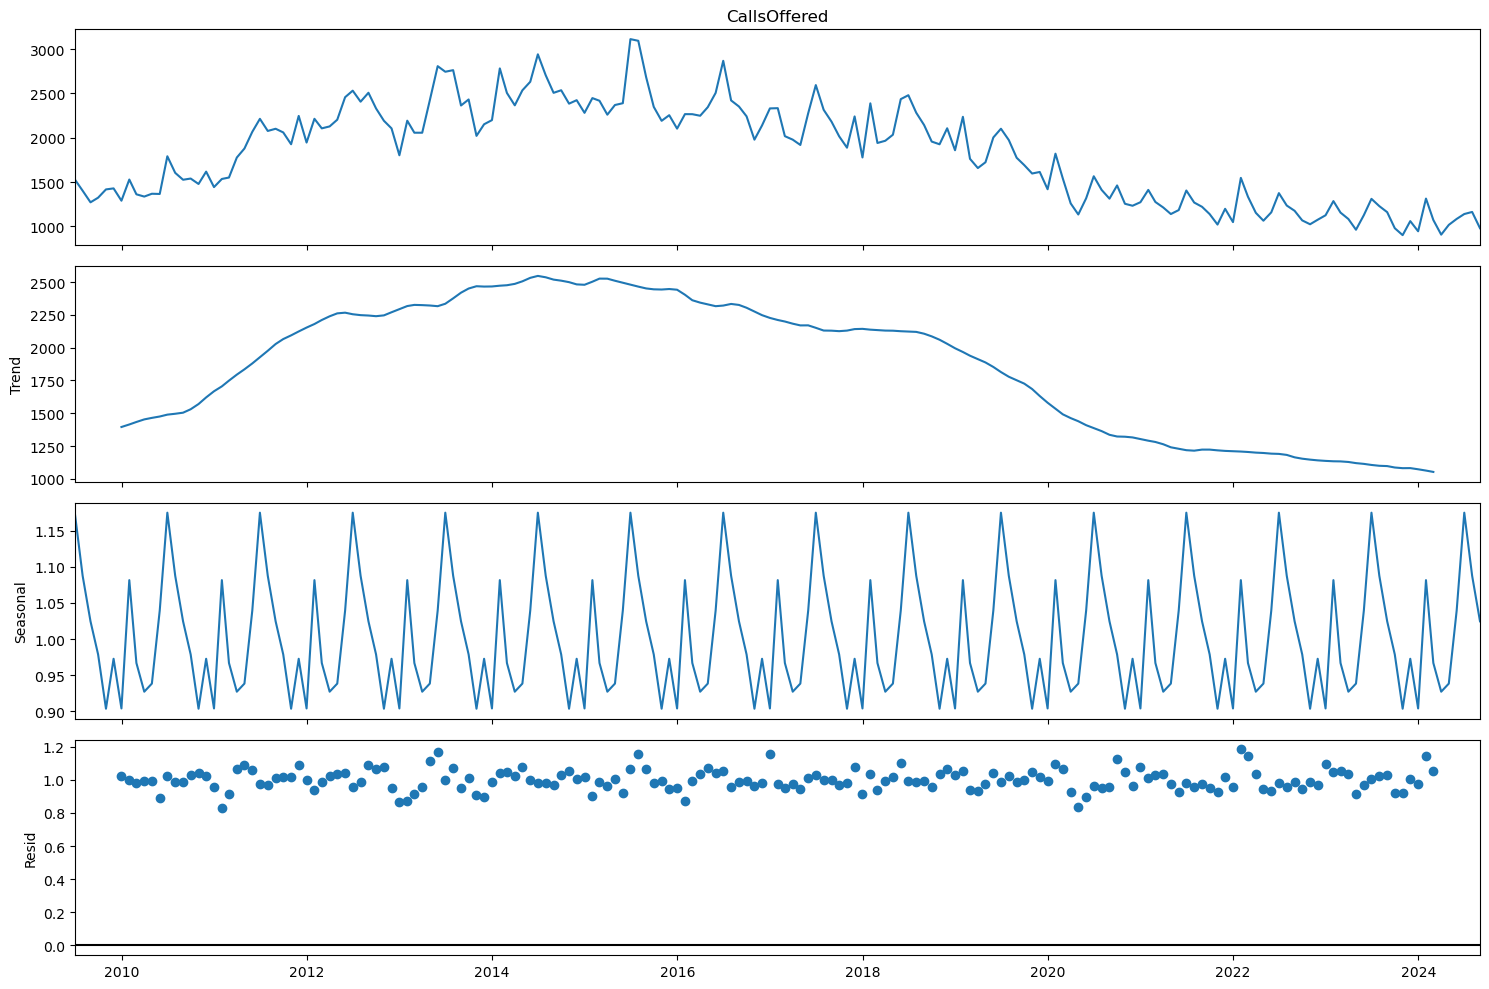

In [5]:
# Apply multiplicative decomposition on the 'CallsOffered' column
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform the seasonal decomposition
result = seasonal_decompose(df['CallsOffered'].resample('M').mean(), model='multiplicative', period=12)
fig = result.plot()
fig.set_size_inches(15, 10)

# Show the plot
plt.tight_layout()
plt.show()

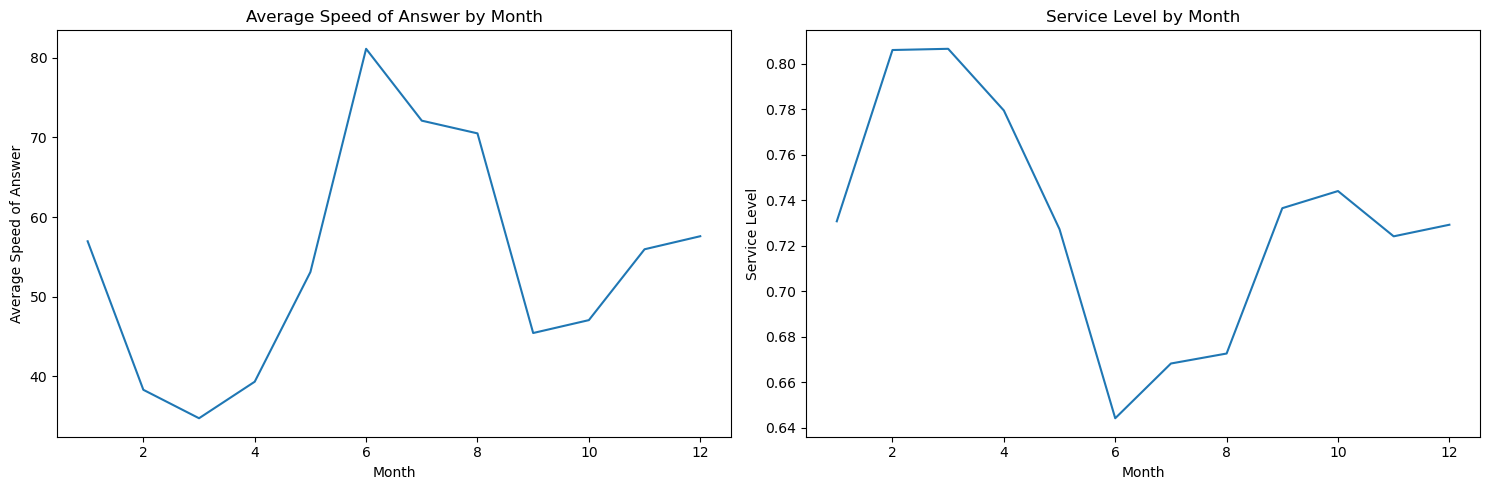

In [6]:
monthly_data = df.groupby('Month')[['AverageSpeedofAnswer', 'ServiceLevel']].mean() # Group the data by month

fig, axarr = plt.subplots(1, 2, figsize=(15, 5))

# Average Speed of Answer plot
axarr[0].plot(monthly_data['AverageSpeedofAnswer'])
axarr[0].set_title('Average Speed of Answer by Month')
axarr[0].set_xlabel('Month')
axarr[0].set_ylabel('Average Speed of Answer')

# Service Level plot
axarr[1].plot(monthly_data['ServiceLevel'])
axarr[1].set_title('Service Level by Month')
axarr[1].set_xlabel('Month')
axarr[1].set_ylabel('Service Level')

plt.tight_layout()
plt.show()

### Permutation Entropy and Anomalies Detection

In [7]:
!pip install ordpy

/var/folders/q3/s6yxqsxx3sx372bh869t8j9r0000gn/T/ipykernel_78597/2305201591.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pe_value = ordpy.permutation_entropy(df['CallsOffered'].resample('M').mean(), dx=dx, taux=taux, normalized=True)


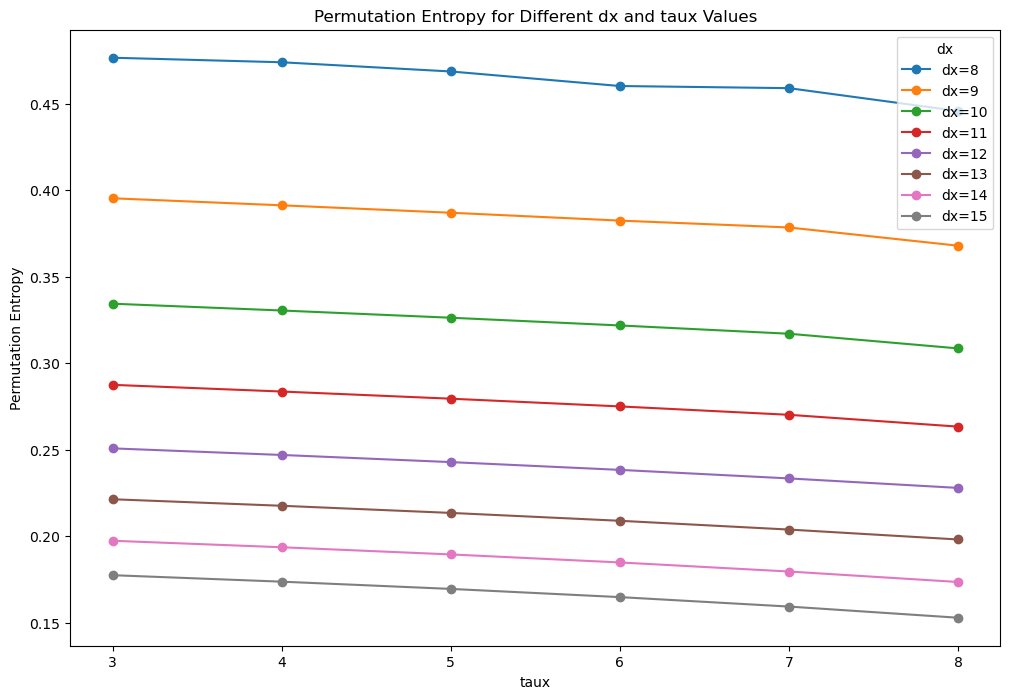

In [8]:
import ordpy

# Try different values of dx and taux and plot the results
dx_values = range(8, 16, 1)
taux_values = range(3, 9, 1)
pe_results = []

for dx in dx_values:
    for taux in taux_values:
        pe_value = ordpy.permutation_entropy(df['CallsOffered'].resample('M').mean(), dx=dx, taux=taux, normalized=True)
        pe_results.append((dx, taux, pe_value))

# Convert results to a DataFrame for easier plotting
pe_df = pd.DataFrame(pe_results, columns=['dx', 'taux', 'pe_value'])

# Plot the results using a line plot for better visualization of optimal values
plt.figure(figsize=(12, 8))
for dx in dx_values:
    subset = pe_df[pe_df['dx'] == dx]
    plt.plot(subset['taux'], subset['pe_value'], marker='o', label=f'dx={dx}')
plt.title('Permutation Entropy for Different dx and taux Values')
plt.xlabel('taux')
plt.ylabel('Permutation Entropy')
plt.legend(title='dx')
plt.show()


### ARIMA Forecasting

In [9]:
!pip install pmdarima

/var/folders/q3/s6yxqsxx3sx372bh869t8j9r0000gn/T/ipykernel_78597/290370017.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train_set, test_set = train_test_split(df['CallsOffered'].resample('M').mean(), test_size=0.1, shuffle=False)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2219.358, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2137.936, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2169.596, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2217.366, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2214.131, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2128.403, Time=0.26 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2121.357, Time=0.25 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2171.550, Time=0.13 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2120.736, Time=0.70 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2146.853, Time=0.26 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : 

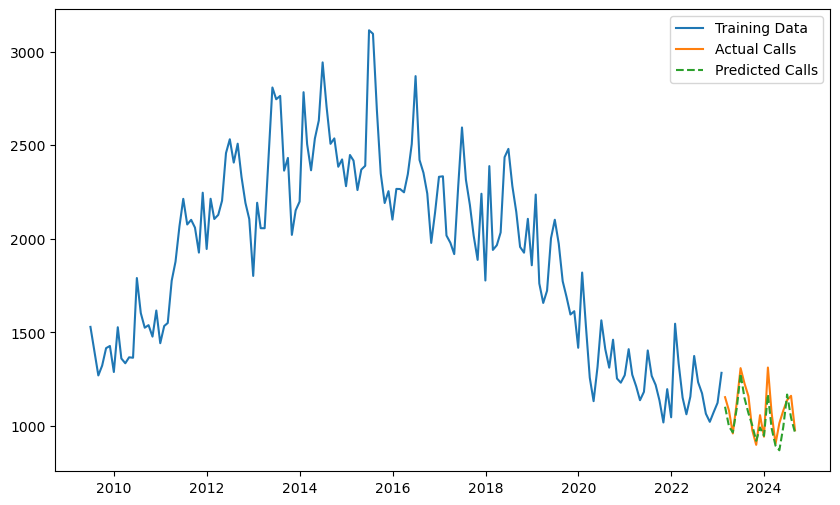

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df['CallsOffered'].resample('M').mean(), test_size=0.1, shuffle=False)

# # Fit an ARIMA model, tune the order (p, d, q) values, p: Number of lag observations (AR term), d: Number of times that the observations are differenced (I term), q: Size of the moving average window (MA term)
# model = ARIMA(train_set, order=(3, 1, 14))
# model_fit = model.fit()

# # Make predictions
# predictions = model_fit.forecast(steps=len(test_set))

# # Calculate the RMSE
# rmse = root_mean_squared_error(test_set, predictions)
# print(f'Root Mean Squared Error: {rmse}')

# # Plot the results
# plt.figure(figsize=(10,6))
# plt.plot(train_set, label='Training Data')
# plt.plot(test_set, label='Actual Calls')
# plt.plot(predictions, label='Predicted Calls', linestyle='--')
# plt.legend()
# plt.show()

# use auto_arima to find the best order
from pmdarima import auto_arima

# Fit the model
arima = auto_arima(train_set, seasonal=True, m=12, stepwise=True, suppress_warnings=True, trace=True)

# Make predictions
predictions = arima.predict(len(test_set))

# Calculate the RMSE
rmse = root_mean_squared_error(test_set, predictions)
print(f'Root Mean Squared Error: {rmse}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(train_set, label='Training Data')
plt.plot(test_set, label='Actual Calls')
plt.plot(predictions, label='Predicted Calls', linestyle='--')
plt.legend()
plt.show()


### Seasonal ARIMA Forecasting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08683D+00    |proj g|=  2.07285D-01

At iterate    5    f=  6.02536D+00    |proj g|=  3.47335D-02

At iterate   10    f=  6.00908D+00    |proj g|=  7.06278D-03

At iterate   15    f=  6.00612D+00    |proj g|=  5.24520D-03


 This problem is unconstrained.



At iterate   20    f=  6.00543D+00    |proj g|=  3.67415D-03

At iterate   25    f=  5.98561D+00    |proj g|=  7.08722D-02

At iterate   30    f=  5.96793D+00    |proj g|=  1.38145D-02

At iterate   35    f=  5.96631D+00    |proj g|=  4.45134D-03

At iterate   40    f=  5.96613D+00    |proj g|=  4.92278D-04

At iterate   45    f=  5.96612D+00    |proj g|=  4.48193D-04

At iterate   50    f=  5.96607D+00    |proj g|=  1.06843D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     54      1     0     0   1.068D-03   5.966D+00
  F =   5.9660660993999652     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


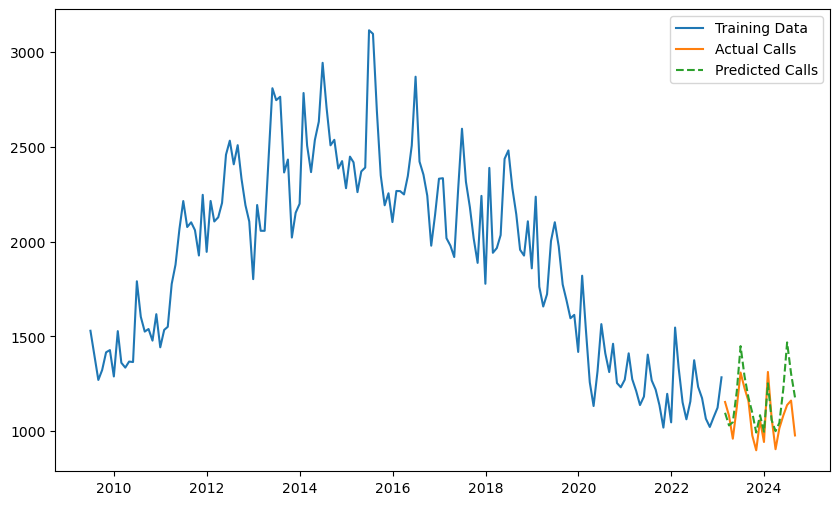

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the model
sarima = SARIMAX(train_set, order=(1, 0, 2), seasonal_order=(1, 1, 1, 12))
model_fit = sarima.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_set))

# Calculate the RMSE
rmse = root_mean_squared_error(test_set, predictions)
print(f'Root Mean Squared Error: {rmse}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(train_set, label='Training Data')
plt.plot(test_set, label='Actual Calls')
plt.plot(predictions, label='Predicted Calls', linestyle='--')
plt.legend()
plt.show()


### Future Trend Forecasting

/var/folders/q3/s6yxqsxx3sx372bh869t8j9r0000gn/T/ipykernel_78597/4061700405.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  arima = ARIMA(df['CallsOffered'].resample('M').mean(), order=(1, 0, 2))
/var/folders/q3/s6yxqsxx3sx372bh869t8j9r0000gn/T/ipykernel_78597/4061700405.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df['CallsOffered'].loc['2020':].resample('M').mean(), label='Historical Data')


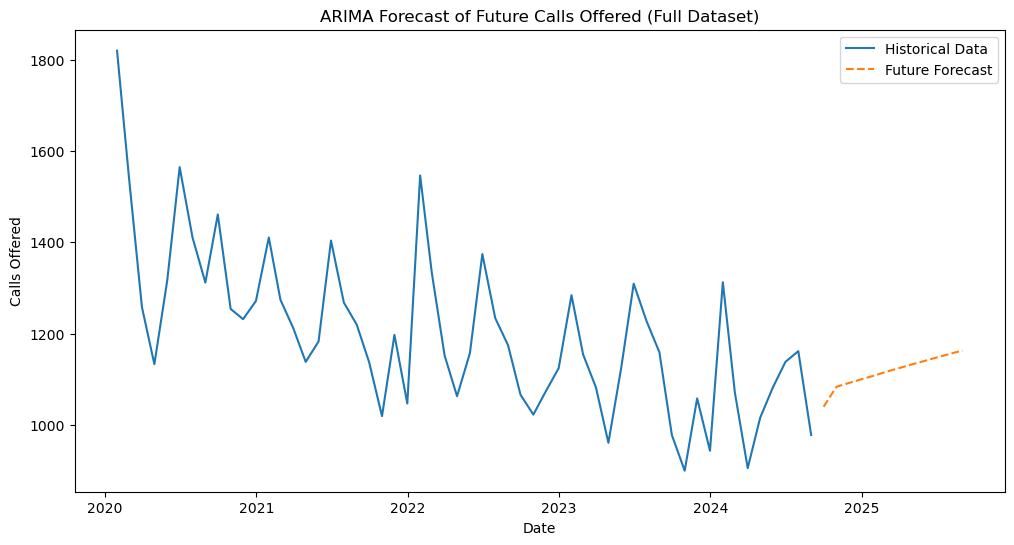

In [22]:
# Fit the ARIMA model on the full dataset
arima = ARIMA(df['CallsOffered'].resample('M').mean(), order=(1, 0, 2))
model_fit = arima.fit()

# Predict future values
future_steps = 12  # Number of future periods to predict (e.g., 12 months)
future_forecast = model_fit.forecast(steps=future_steps)

# Combine the historical data and the forecast for visualization
plt.figure(figsize=(12, 6))
plt.plot(df['CallsOffered'].loc['2020':].resample('M').mean(), label='Historical Data')
plt.plot(future_forecast, label='Future Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Calls Offered')
plt.title('ARIMA Forecast of Future Calls Offered (Full Dataset)')
plt.legend()
plt.show()